# Läs in kommundata

In [15]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Örkelljunga har id 1257 och har som senast totalt 9964 människor som bodde i kommunen. Snittåldern är 46 år


# Läs in bankomatdata

In [2]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 255401, som finns på addressen Göteborgsvägen 99 B, i Ale kommun. Det finns 73 transaktionsadata registrerade. ÄrUte = True
Slumpmässig transaktion
{'månad': '2014M01', 'antalTransaktioner': 4298, 'omsättning': 4229100}


# Deskriptiv Analys

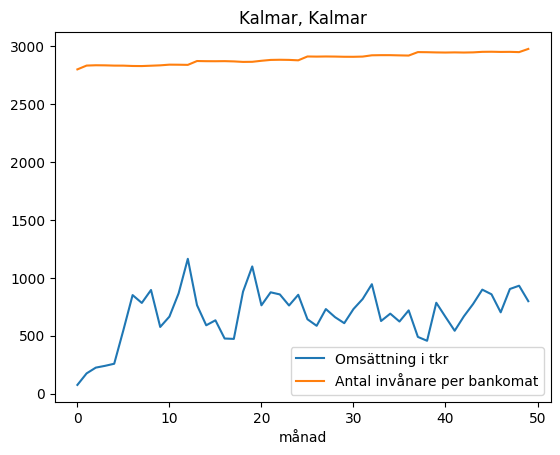

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

bankomaterIFarsta = [bankomat for bankomat in data.bankomater if bankomat.geographicalData["postort"] == "Farsta"]

slumpmässigBankomat = data.bankomater[randint(0, len(data.bankomater)-1)]

# slumpmässigBankomat = bankomaterIFarsta[randint(0, len(bankomaterIFarsta) - 1)]

transaktionsMånader = []

for transaktionsmånad in slumpmässigBankomat.transaktionsDataSEK:
    transaktionsMånader.append(transaktionsmånad)

kommun = [kommun for kommun in data.kommuner if kommun.namn == slumpmässigBankomat.geographicalData["kommun"]][0]

bankomaterIKommunen = [bankomat for bankomat in data.bankomater if bankomat.geographicalData["kommun"] == kommun.namn]

antalBankomater = len(bankomaterIKommunen)

månader = []
omsättningar = []
befolkningar = []

for månad in transaktionsMånader:
    befolkningar.append(kommun.data[månad["månad"]]["total"] / antalBankomater)
    månader.append(månad["månad"])
    omsättningar.append(månad["omsättning"]/1000)

plt.plot(range(len(månader)), omsättningar, befolkningar)
plt.title(slumpmässigBankomat.geographicalData["postort"] + ", " + kommun.namn)
plt.xlabel("månad")
plt.legend(["Omsättning i tkr", "Antal invånare per bankomat"])